# Classification

### What is Binary Classification?
Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc. A few real world use cases for classification are listed below:

Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.
A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

#### Pycaret classification

PyCaret's classification module `pycaret.classification` is a supervised machine learning module which is used for classifying the elements into groups based on various techniques and algorithms. The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models.

## Import libraries

In [1]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import check_metric

import plotly.express as px

from sklearn.model_selection import train_test_split

## Load dataset

With pycaret comes a lot of datasets that we can access using `get_data` function.

In [3]:
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


### Heart disease dataset

For this tutorial we will use a dataset from UCI called *Heart disease data set*. This dataset contains information of potential heart disease patients from 1988. The target is to classify if the patient has heart disease or not (column `Disease`) There are 270 samples and 14 features. Short descriptions of each column are as follows:

**age** = age in years </br>
**sex** = 1=male, 0=female </br>
**chest_pain_type** = chest pain type </br>
-- Value 1: typical angina </br>
-- Value 2: atypical angina </br>
-- Value 3: non-anginal pain </br>
-- Value 4: asymptomatic </br>
**resting_blood_pressure** = resting blood pressure in mmHg  </br>
**serum_cholestoral_in_mg/dl** = serum cholestoral in mg/dl </br>
**fasting_blood_sugar_>_120_mg/dl** = 1=true, 0=false </br>
**resting_electrocardiographic_results** =  </br>
-- Value 0: normal </br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) </br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria </br>
**maximum_heart_rate_achieved** =  </br>
**exercise_induced_angina** = 1=true, 0=false </br>
**oldpeak** = ST depression induced by exercise relative to rest </br>
**slope_of_peak** = the slope of the peak exercise ST segment </br>
-- Value 1: upsloping </br>
-- Value 2: flat </br>
-- Value 3: downsloping </br>
**number_of_major_vessels** = number of major vessels (0-3) colored by flourosopy </br>
**thal** = 3 = normal; 6 = fixed defect; 7 = reversable defect </br>
**Disease** =  </br>
-- Value 0: < 50% diameter narrowing, no disease </br>
-- Value 1: > 50% diameter narrowing, disease </br>

In [66]:
df = get_data('heart_disease')

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [142]:
df.columns()

TypeError: 'Index' object is not callable

In [ ]:
# Ex1


In [101]:
# %load solutions/pyc_1.py

In [102]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mg/dl,fasting_blood_sugar_>_120_mg/dl,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_peak,number_of_major_vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [103]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mg/dl,fasting_blood_sugar_>_120_mg/dl,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_peak,number_of_major_vessels,thal,Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


<br>

### Split data into a [Training set and a Test set](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In supervised machine learning, a key question regards the evaluation of models - how good are they? Just like statistics uses things like $R^2$ as a goodness-of-fit measure, the machine learning pipeline is equipped with methods of measuring a model's quality. To do this without a bias, we cannot test the model on the same data it was trained on - but on a separate test set. We therefore split the data like below.

**75% for training and 25% for testing (by default)** 

Fix a `random_state` for reproducibility: `train_test_split` splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result. If you seed your random number generator with a fixed number (say 42), your split will be always the same. 
![title](assets/Train_test_sets.jpg)

Pycaret will do the splitting automatically but we can still save part of the data to test on the finalized model. This way we can test the finalized model using completely new unseen data .

In [104]:
# split dataset to data and target
data = df.loc[:, df.columns != 'Disease']
target = df['Disease']

# split to train and test. Set test_size to 0.05 since pycaret will automatically do the 75/25 split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=42, test_size=0.05)

In [105]:
X_train.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mg/dl,fasting_blood_sugar_>_120_mg/dl,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_peak,number_of_major_vessels,thal
165,64,0,4,180,325,0,0,154,1,0.0,1,0,3
194,48,1,3,124,255,1,0,175,0,0.0,1,2,3
226,62,0,3,130,263,0,0,97,0,1.2,2,1,7
146,52,1,4,112,230,0,0,160,0,0.0,1,1,3
104,63,1,4,130,254,0,2,147,0,1.4,2,1,7


## Visualizing

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# easy function for plotting features
def boxplot(data, x, y):
    plt.figure(figsize = (10,7))

    # Usual boxplot
    ax = sns.boxplot(x=x, y=y, data=data)
 
    # Add jitter with the swarmplot function.
    ax = sns.swarmplot(x=x, y=y, data=data, color="grey")

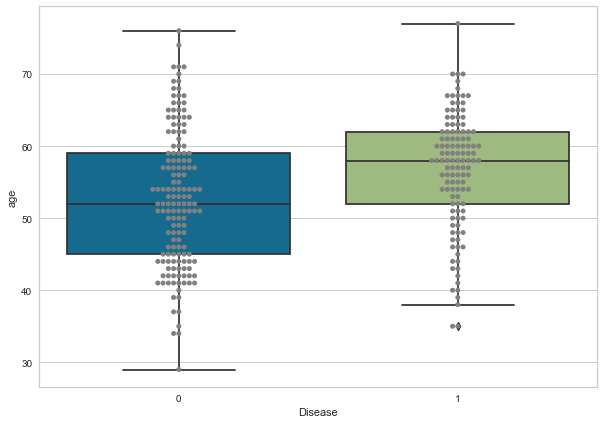

In [108]:
# plot age and target
boxplot(df, target, 'age')

## Preprocessing
**Normalization**: Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly. For instance, in the dataset we are using for this example the AGE feature ranges between 29 to 77 while other numeric features like cholesterol range from 126 to 564. <a href="https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling">Read more</a>

**Transformation**: While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximate normal distirbution. In general, you should transform the data if using algorithms that assume normality or a gaussian distribution. Examples of such models are Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes. (Pro tip: any method with “Gaussian” in the name probably assumes normality.) <a href="https://en.wikipedia.org/wiki/Power_transform">Read more</a>

## Setting up Environment in PyCaret

### Classification in Pycaret

`setup()` is Pycaret's main function and it needs to be run before executing any other function in pycaret. The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

`session_id` parameter is equivalent to ‘random_state’ in scikit-learn. Let's use 42 for reproducibility.

In [109]:
# when doing classification, setup() takes two mandatroy parameters: data and target
s = setup(X_train, target=y_train, normalize = True, session_id=42)

,Description,Value
0,Session id,42
1,Target,Disease
2,Target type,Binary
3,Original data shape,"(256, 14)"
4,Transformed data shape,"(256, 14)"
5,Transformed train set shape,"(179, 14)"
6,Transformed test set shape,"(77, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


## Create a model

In [110]:
# list all ML models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Pycaret runs all different ML algorhitms using default parameters. We can compare all models using `compare_models()` which puts all models in order from best to worst.

In [111]:
# best model is saved in best_model object
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8382,0.9032,0.8625,0.7987,0.8234,0.6746,0.6870,0.0670
lr,Logistic Regression,0.8320,0.8939,0.7875,0.8281,0.7984,0.6561,0.6656,1.1740
ridge,Ridge Classifier,0.8265,0.0000,0.7750,0.8257,0.7899,0.6442,0.6546,0.0480
lda,Linear Discriminant Analysis,0.8265,0.8978,0.7750,0.8257,0.7899,0.6442,0.6546,0.0490
nb,Naive Bayes,0.8212,0.8969,0.8125,0.7961,0.7957,0.6372,0.6478,0.0490
lightgbm,Light Gradient Boosting Machine,0.8154,0.9007,0.7875,0.7967,0.7822,0.6231,0.6347,0.0560
et,Extra Trees Classifier,0.8101,0.9074,0.7500,0.8212,0.7695,0.6106,0.6278,0.1720
gbc,Gradient Boosting Classifier,0.8098,0.8849,0.8125,0.7811,0.7881,0.6158,0.6268,0.1170
svm,SVM - Linear Kernel,0.7990,0.0000,0.7250,0.8004,0.7488,0.5855,0.5968,0.0360
rf,Random Forest Classifier,0.7987,0.8910,0.7375,0.8129,0.7601,0.5886,0.6037,0.1970


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

This gives us lots of metrics we can use to evaluate the results:


**Accuracy** = $ \frac{Correctly\:predicted}{Total\:samples}$  <br>
It's simple and informative but doesn't give us the whole picture since sometimes e.g. false negative predictions should be minimized. <br><br>

**Precision** = $ \frac{True\:positive}{Total\:predicted\:positive}$ <br>
Precision is a measure to determine, how precise model's positive predictions are. If model is trying to predict spam-emails (1), low precision means that rate of false positives is high i.e. lots of valid emails (0) are classified as spam.<br> <br>

**Recall** = $ \frac{True\:positive}{Total\:actually\:positive}$ <br>
In other words how many actual positives are classified correctly. Using the same example, spam emails leak into your inbox as normal emails if recall is low. <br><br>

**F1** = $ 2* \frac{Precision*Recall}{Precision+Recall}$ <br>
F1 score tells the balance between precision and recall. It's similar to accuracy but takes false positives and negatives into account, making it better metric if false predictions are significant. In addition if class distribution is uneven (e.g lots of negatives and only few positives), model may predict all negative, making accuracy high but F1-score low.


<img src="./assets/precisionrecall.png" width="400" height="500">

Let's make few model using 10 fold stratified **cross validation**. You can change number of folds using `fold` parameter

In [112]:
# decision tree classifier
dt = create_model('dt', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.611,0.625,0.750,0.545,0.632,0.241,0.255
1,0.611,0.588,0.375,0.600,0.462,0.182,0.194
2,0.833,0.850,1.000,0.727,0.842,0.675,0.714
3,0.778,0.788,0.875,0.700,0.778,0.561,0.575
4,0.667,0.662,0.625,0.625,0.625,0.325,0.325
5,0.556,0.538,0.375,0.500,0.429,0.077,0.079
6,0.500,0.475,0.250,0.400,0.308,-0.052,-0.055
7,0.833,0.838,0.875,0.778,0.824,0.667,0.671
8,0.778,0.775,0.750,0.750,0.750,0.550,0.550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [113]:
# random forest classifier 
rf = create_model('rf', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.611,0.762,0.625,0.556,0.588,0.222,0.224
1,0.778,0.856,0.500,1.000,0.667,0.526,0.598
2,0.889,1.000,1.000,0.800,0.889,0.780,0.800
3,0.944,0.994,1.000,0.889,0.941,0.889,0.894
4,0.833,0.938,0.750,0.857,0.800,0.658,0.663
5,0.889,0.981,0.750,1.000,0.857,0.769,0.791
6,0.667,0.662,0.500,0.667,0.571,0.308,0.316
7,0.833,0.875,0.875,0.778,0.824,0.667,0.671
8,0.778,0.925,0.625,0.833,0.714,0.538,0.553


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [114]:
# k nearest neighbors
knn = create_model('knn', round = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.833,0.894,0.750,0.857,0.800,0.658,0.663
1,0.778,0.794,0.625,0.833,0.714,0.538,0.553
2,0.889,0.987,1.000,0.800,0.889,0.780,0.800
3,0.889,0.981,0.875,0.875,0.875,0.775,0.775
4,0.778,0.925,0.750,0.750,0.750,0.550,0.550
5,0.778,0.900,0.625,0.833,0.714,0.538,0.553
6,0.667,0.750,0.500,0.667,0.571,0.308,0.316
7,0.778,0.881,0.750,0.750,0.750,0.550,0.550
8,0.778,0.875,0.750,0.750,0.750,0.550,0.550


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Plotting the models

#### Confusion matrix

A confusion matrix summarizes the performance of a classification algorithm.

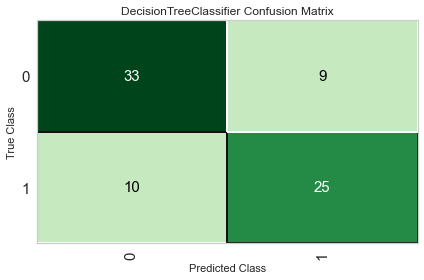

In [115]:
plot_model(dt, plot = 'confusion_matrix')

#### Error plot

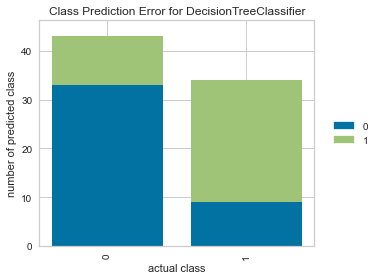

In [116]:
plot_model(dt, plot = 'error')

#### Boundary plot

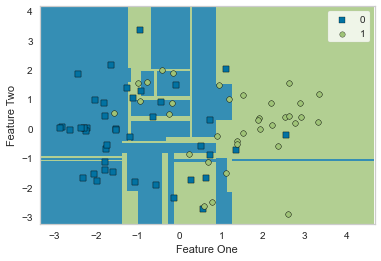

In [117]:
plot_model(dt, plot = 'boundary')

#### Feature plot

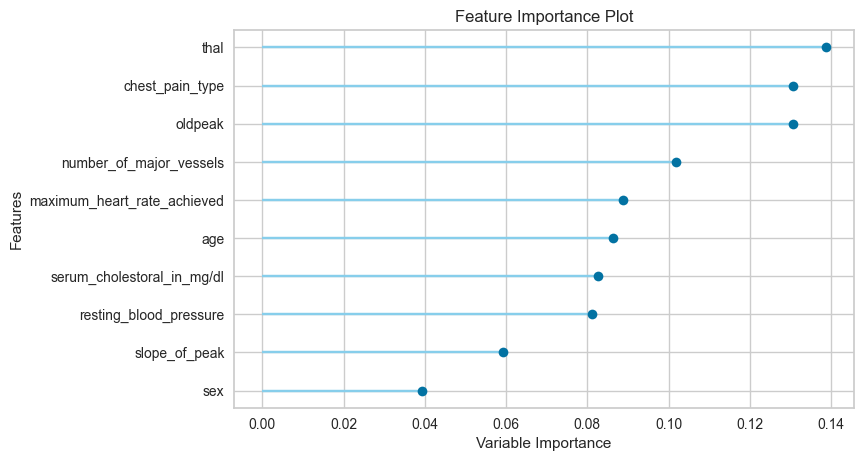

In [118]:
plot_model(rf, plot='feature')

<div class='alert alert-warning'>
<h4>Exercise 2. What is the most important feature? Plot that feature and 'Disease' and check if you can notice any correlation.</h4>
</div>

In [ ]:
# Ex2


In [ ]:
#%load solutions/pyc_2.py

## Tune a model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. The `tune_model()` function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. For example: tune_model(dt, optimize = 'AUC') will search for the hyperparameters of a Decision Tree Classifier that results in highest AUC.

In [120]:
tuned_dt = tune_model(dt, round=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.611,0.600,0.500,0.571,0.533,0.203,0.204
1,0.611,0.575,0.250,0.667,0.364,0.160,0.200
2,0.833,0.850,1.000,0.727,0.842,0.675,0.714
3,0.889,0.888,0.875,0.875,0.875,0.775,0.775
4,0.833,0.838,0.875,0.778,0.824,0.667,0.671
5,0.944,0.938,0.875,1.000,0.933,0.886,0.892
6,0.556,0.525,0.250,0.500,0.333,0.053,0.060
7,0.833,0.812,0.625,1.000,0.769,0.649,0.693
8,0.722,0.688,0.375,1.000,0.545,0.400,0.500


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [121]:
tuned_rf = tune_model(rf, round=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.722,0.812,0.625,0.714,0.667,0.430,0.433
1,0.833,0.888,0.625,1.000,0.769,0.649,0.693
2,0.944,1.000,1.000,0.889,0.941,0.889,0.894
3,0.944,0.988,1.000,0.889,0.941,0.889,0.894
4,0.833,0.925,0.750,0.857,0.800,0.658,0.663
5,0.944,0.988,0.875,1.000,0.933,0.886,0.892
6,0.667,0.700,0.500,0.667,0.571,0.308,0.316
7,0.889,0.875,0.875,0.875,0.875,0.775,0.775
8,0.833,0.925,0.750,0.857,0.800,0.658,0.663


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [122]:
tuned_knn = tune_model(knn, round=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.833,0.938,0.750,0.857,0.800,0.658,0.663
1,0.833,0.888,0.625,1.000,0.769,0.649,0.693
2,0.944,0.988,0.875,1.000,0.933,0.886,0.892
3,0.889,0.988,0.875,0.875,0.875,0.775,0.775
4,0.833,0.850,0.625,1.000,0.769,0.649,0.693
5,0.944,1.000,0.875,1.000,0.933,0.886,0.892
6,0.611,0.762,0.375,0.600,0.462,0.182,0.194
7,0.833,0.875,0.750,0.857,0.800,0.658,0.663
8,0.722,0.862,0.500,0.800,0.615,0.416,0.444


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Notice how the results after tuning have improved:

**Decision tree:** from `0.687` to `0.760` </br>
**Random forest classification:** from `0.799` to `0.843`  </br>
**K nearest neighbors:** from `0.793` to `0.827`  </br>

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc.

## Predict on test data

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid after running `setup()`, you will see that 30% (154 samples) of the data has been separated out as test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_lr variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [123]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8052,0.9143,0.8286,0.7632,0.7945,0.6099,0.6118


The accuracy of test set is `0.805` compared to `0.843` achieved with the train set. This is not significant difference (since the dataset is quite small) but if there is a large variation between the test and train results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and then predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

## Finalize model

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [124]:
final_rf = finalize_model(tuned_rf)

## Predict on unseen data

Now we can use the test data `X_test` and try to classify them with our trained model. For this we use pycaret's `predict_model()` function and pass the unseen testdata as parameter.

In [130]:
predictions = predict_model(final_rf, data=X_test) # pass the model and test-data as parameters
predictions.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral_in_mg/dl,fasting_blood_sugar_>_120_mg/dl,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_of_peak,number_of_major_vessels,thal,Label,Score
30,0.271207,0.686487,-0.176528,-0.195241,-0.403008,-0.411035,1.003929,0.012277,-0.711254,-0.562865,0.687355,0.314711,1.186981,1,0.5573
116,-0.929608,0.686487,0.874428,-0.641010,-0.019903,-0.411035,1.003929,-0.246036,-0.711254,-0.215233,-0.941930,-0.731600,1.186981,1,0.5312
79,0.162042,0.686487,-1.227484,-0.641010,-0.268921,-0.411035,-1.003929,1.217736,-0.711254,-0.215233,-0.941930,-0.731600,-0.876633,0,0.9143
127,-0.274618,-1.456692,-0.176528,0.250527,-1.035130,-0.411035,1.003929,0.830267,-0.711254,-0.823589,0.687355,-0.731600,-0.876633,0,0.9476
196,0.380372,-1.456692,0.874428,-1.755431,-0.039059,-0.411035,1.003929,-1.193183,-0.711254,-0.041417,0.687355,-0.731600,-0.876633,0,0.6052


The *Label* and *Score* columns are added onto the X_test set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column `y_test` available. To do that we will use pycaret.utils module. You can do this easily with basic python, but this is good way if you want to check any other metrics (other than accuracy) as well. See example below:

In [131]:
from pycaret.utils import check_metric

# compare target and predicted labels
print("Prediction accuracy", check_metric(y_test, predictions['Label'], metric = 'Accuracy')) 
print("Prediction recall",check_metric(y_test, predictions['Label'], metric = 'Recall'))

Prediction accuracy 1.0
Prediction recall 1.0


You can use sklearn to plot confusion matrix:

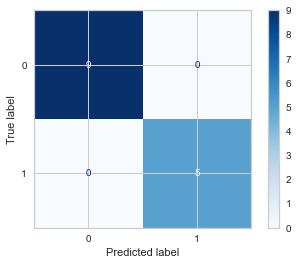

In [135]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(final_rf, X=X_test, y_true=y_test, cmap='Blues') # parameters: model, input values X, target values y